<a href="https://colab.research.google.com/github/RaivoKasepuu/BDA_Tartu_MTAT_03_319/blob/master/BDA_lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> <font color='black'> Business Data Analytics - Practice Session_07 </font></center></h1>
<h2><center> <font color='black'> A/B Testing</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>


## Introduction

1. What is **A/B** testing, and why you should care?
    * `A/B` testing is a statistical way to compare two different version such as **version A (default)**, and **Version B**. A/B testing is used not only for which version performs better, but also to test if the difference between the two version is statisticlly significant **(level of significant)** or not.

    * Businessses think that they understnd how the customer will behave, but in reality customers would behave much different than what would you think. 

    * In order to A/B testing for work we should define the **criteria of success** (Conversion rate - Newsletters sign-ups) before you begin your test, **what is your hypothesis**, or what do you think will happen by changing to Version B. Also we need to identify how many peopole **(Sample)** should we use to get significant results. 
    
    * **For example,** you compare two different `web pages` or two different newsletters. 

    
    
### What Is A Conversion Rate?

1. The conversion rate is the number of conversions divided by the total number of visitors. For example, if an e-commerce site receives 200 visitors in a month and has 50 sales, the conversion rate would be 50 divided by 200, or 25%.

2. A conversion can refer to **any desired action that you want the user to take.** This can include anything from a `click on a button` to `making a purchase and becoming a customer`. Websites and apps often have multiple conversion goals, and each will have its own conversion rate.


![steps1](https://i.ibb.co/RYVrTrY/testing-steps-1.png)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt # For creating plots
%matplotlib inline 


#Let's make this notebook reproducible, you can use any number ex = 42
np.random.seed(42)


# set plot style for all plots
plt.style.use('ggplot')

### Loading the data

Let us take a look at the following data:

![step2](https://i.ibb.co/Jdp2hFy/testing-steps-2.png)

In [ ]:
df  = pd.read_csv('ab_clicks.csv', sep='\t')
df.head(100)

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
...,...,...,...,...,...,...
95,15,div,"Explore the world, explore the past Science & ...",3,True,Connect
96,47,span,nav-item-dot,3,True,Connect
97,49,a,nav-item,3,True,Connect
98,65,form,Search,3,True,Connect


1. **Element_ID:** we have different elemetns (links) in our web page. 

2. **Tag_name:** from HTML for web development.

3. **Name:** we have a name for each elemnt.

4. **No_clicks:** how many clicks that different users perform for each element.

5. **Visible:** Element is visible or not.

6. **Version:** our element belongs to which version.


## Let's understand our data

In [ ]:
# check for missing values or unclean data
df.isnull().sum()

Element_ID    0
Tag_name      0
Name          0
No_clicks     0
Visible       0
Version       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Element_ID  299 non-null    int64 
 1   Tag_name    299 non-null    object
 2   Name        299 non-null    object
 3   No_clicks   299 non-null    int64 
 4   Visible     299 non-null    bool  
 5   Version     299 non-null    object
dtypes: bool(1), int64(2), object(3)
memory usage: 12.1+ KB


#### Let’s look ad unique values in the data:

* Amout of different html elements:

In [ ]:
# unique html elements

print(f"We have {len(df.Element_ID.unique())} unique html elements ")

We have 108 unique html elements 


* What different tags are there:

In [ ]:
print(f"Tags: \n\n {df.Tag_name.unique()}")

Tags: 

 ['area' 'a' 'input' 'button' 'span' 'p' 'div' 'form' 'img' 'ul' 'li'
 'object' 'center' 'strong' 'font']


In [ ]:
print(f"Valuese for feature Visible: {df.Visible.unique()}")

Valuese for feature Visible: [False  True]


In [ ]:
print(f"Numbers of versions is {len(df.Version.unique())}: {df.Version.unique()}")

Numbers of versions is 5: ['Interact' 'Connect' 'Learn' 'Help' 'Services']


This is the cleaned version of the data from [University of Montana](https://scholarworks.montana.edu/xmlui/handle/1/3507) University of Montana explored that the button Interact on their page is heavily underused. They surveyed the problem by conducting questionnaires and realized that the name might be one of the reasons being too intimidating. They came up with several other **versions:**

1. Interact version.
2. Connect version.
3. Help. 
4. Services.
5. Learn.

![clicks](https://i.ibb.co/XZRgbnS/clicks.jpg)

In the above image they noticed that the button **Interact** is rarely clicked and the decision to make different versions from this web page and apply the A/B testing to check if the difference between the two versions is statistically significant or not. 

![clicks](https://i.ibb.co/rfTz3nM/clicks2.jpg)

![clicks](https://i.ibb.co/FwrTJTS/clicks3.jpg)


![clicks](https://i.ibb.co/rpyp2wg/clicks4.jpg)

![clicks](https://i.ibb.co/Prdcjx1/clicks5.jpg)

* First, we have to look at the amount of the clicks on the sites:

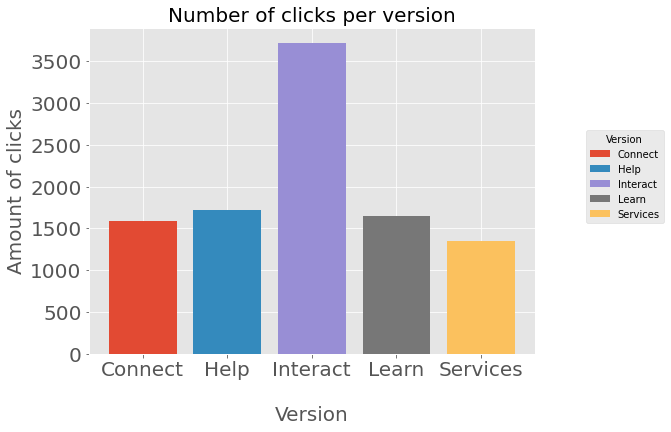

In [ ]:
# group data by Version
groups = df.groupby('Version')

# Plot 
fig, ax = plt.subplots(figsize=(8, 6))

clicks =[]
# plot line for each customer 
for Version, group in groups:
    ax.bar(group.Version, sum(group.No_clicks), label=Version)
    clicks.append(sum(group.No_clicks))
    


# Make our graph cool, and understandable

# put the legend outside the graph
ax.legend(bbox_to_anchor=(1.3, 0.7), title="Version",)


    
# set titles for figure, x, y
plt.title('Number of clicks per version',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

* Based on this plot, we can say that in the data we have version of the site with `Interact` button has more clicks in total than others.


In [ ]:
clicks = []
for Version,group in groups:
    clicks.append(sum(group.No_clicks))
    print(f"no of clicks in version: {Version} is {sum(group.No_clicks)}")
    
clicks

no of clicks in version: Connect is 1587
no of clicks in version: Help is 1717
no of clicks in version: Interact is 3714
no of clicks in version: Learn is 1652
no of clicks in version: Services is 1348


[1587, 1717, 3714, 1652, 1348]

* Let’s take amount of the clicks on the button Interact at the different sites and plot it.

* First we have to find ids of the elements that is used for button Interact in different versions:

In [ ]:
df.head()

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
0,128,area,Montana State University - Home,1291,False,Interact
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact


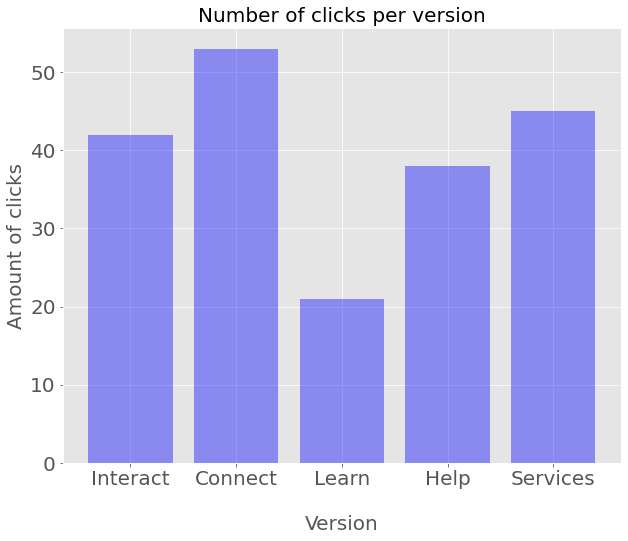

In [ ]:
# filter our data based on buttons name
btn_names = ["INTERACT", "LEARN", "CONNECT", "HELP", "SERVICES"]

newdf = df[df['Name'].isin(btn_names)]


# Plot
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(newdf.Version, newdf.No_clicks, color='b', alpha = 0.4)
    
    
# set titles for figure, x, y
plt.title('Number of clicks per version',fontsize=20)
plt.xlabel('\nVersion', fontsize=20)
plt.ylabel('Amount of clicks',fontsize=20)


plt.xticks(fontsize = 20) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show()

* This plot contains numbe of clicks for buttons that we are interested in, In compare to the last plot we can see that Interact version has less numbe rof clicks. 

**Now we can't say that interact version is good or not compares to others, and beacuse of that we need to apply the `A/B testing` to cheack our hypothesis:** 


## A/B testing:

![steps3](https://i.ibb.co/pbPswTT/testing-steps-3.png)

We will take two diferent versions of our web site `(A (Interact)` default version, and `B (Connect)` you can chose it randomly) or based on the most closer to Interact version.

### What is our hypothesis?

1. **Null hypothesis $(H_0)$:** There is no difference between version `A: Interact` and version `B: Connect`.


2. **Alternative hypothesis $(H_a)$** there is a difference between version `A: Interact` and version `B: Connect.


### How to accept or reject the $H_0$?
1. Based on the `p-value`, and the `level of significance`. 

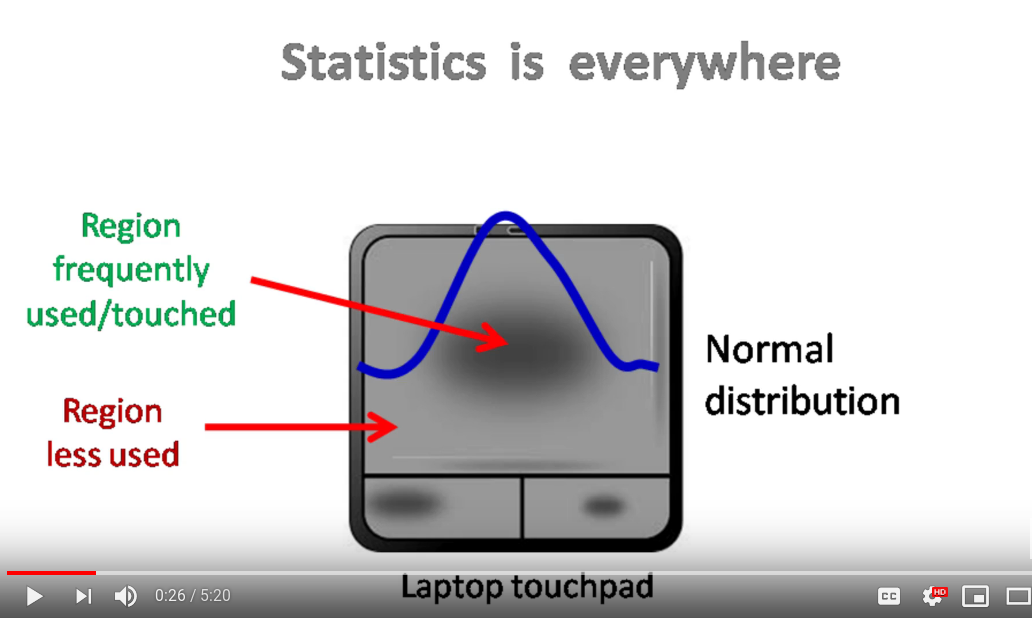

https://www.youtube.com/watch?v=3viE4s-Xm7U

**p-value** is the probability of `$H_0$` to be `true`, and it can be any number between $0$, and $1$.

<center>p-value $\gt$ level of significance   : Accept $H_0$</center> 

<center>p-value $\lt$ level of significance   : Reject $H_0$</center> 



**significance value:** Researchers can set their value of significance based on their research. In our practice session we will set $s.v = 0.05$


**Example:** Let's say that the `p-value` in the less used region $= 0.01$ that means this region is touched $1$ time per $100$

<center>p-value = $0.01$ $\lt$ $s.v = 0.05$   : Reject $H_0$</center> 

In [ ]:
# filter data by Tag_name == area
# df_filter = df_cleaned
df_filter =  df['Tag_name']!='area'
df_filter = df[df_filter]
df_filter

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
...,...,...,...,...,...,...
294,116,div,Â© MSU About MSU Library Accessibility Contact...,1,True,Services
295,130,div,lib.montana.edu/interact/,1,False,Services
296,131,center,lib.montana.edu/hours/,1,False,Services
297,132,font,ì§€ì €ê·€ë‹¤,1,False,Services


In [ ]:
# get only data about our two version Interact, and Connect
df_interact_connect = (df_filter['Version']=='Interact') | (df_filter['Version']=='Connect')
df_interact_connect = df_filter[df_interact_connect]

df_interact_connect.head(10)

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
1,69,a,FIND,842,True,Interact
2,61,input,s.q,508,True,Interact
3,67,a,lib.montana.edu/find/,166,True,Interact
4,78,a,REQUEST,151,True,Interact
5,98,a,Hours,102,True,Interact
6,62,button,Search,101,True,Interact
7,118,a,MSU,55,True,Interact
8,50,span,nav-item-dot,46,True,Interact
9,87,a,INTERACT,42,True,Interact
10,76,a,lib.montana.edu/request/,38,True,Interact


In [ ]:
from plotly.figure_factory import create_table as ct

# to get different test statistics in python 
from scipy import stats
import scipy

sample1_interact = df_interact_connect[df_interact_connect['Version']=='Interact']
sample2_connect = df_interact_connect[df_interact_connect['Version']=='Connect']



twosample_results = stats.ttest_ind(sample1_interact['No_clicks'], sample2_connect['No_clicks'])

if twosample_results[1] < 0.05:
    s = "Reject the Null Hypothesis"
else:
    s = "Accept the Null Hypothesis"

matrix_twosample = [
    ['', 'Test Statistic', 'p-value', 'comment'],
    ['Sample#2 Data', twosample_results[0], twosample_results[1], s]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

In [ ]:
import numpy as np, statsmodels.stats.api as sms


cm = sms.CompareMeans(sms.DescrStatsW(sample2_connect['No_clicks']), sms.DescrStatsW(sample1_interact['No_clicks']))
print (f"95 percent confidence interval:\n{cm.tconfint_diff(usevar='unequal')}\n")
       
       
print(f"Sample esitimate:\nmean in group Connect: {sample2_connect['No_clicks'].mean()}\nmean in group Interac:\
      {sample1_interact['No_clicks'].mean()}")

95 percent confidence interval:
(-45.370634785418446, 26.87785872762691)

Sample esitimate:
mean in group Connect: 26.385964912280702
mean in group Interac:      35.63235294117647


**T,** the greater the evidence against the null hypothesis. This means there is greater evidence that there is a significant difference. `The closer T is to 0, the more likely there isn't a significant difference.`

What can we conclude from results above? Did we performed the test correctly? `because the data should be normally distributed` if we want to see the true results. 

#### Let’s check wether amount of clicks is gaussian distribution.
1. Plot the distribution of the data.
2. using `QQplot`
3. `AD-Test` (Anderson Darling test)
4. `Shapiro test`
5. `wilcoxon test` (no normality assumption)

### Plot the distribution of the data.

Text(0.5, 1.0, 'Distribution of No_clicks')

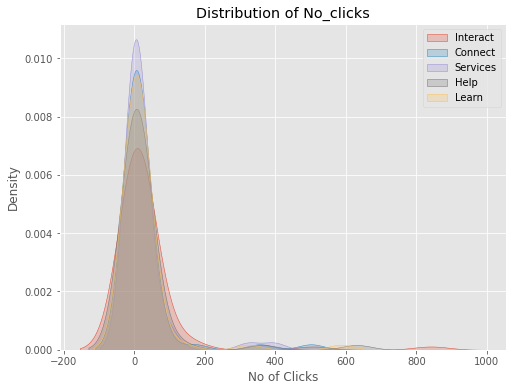

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Learn') ],
                ax =ax,  shade= True)
   


ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
#ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

Text(0.5, 1.0, 'Distribution of No_clicks')

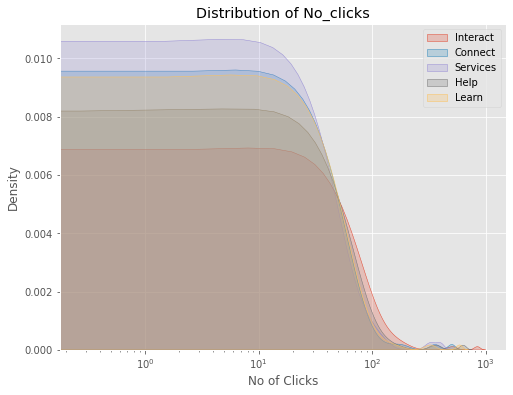

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Interact') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Connect') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Services') ],
                 shade = True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Help') ],
                ax =ax,  shade= True)
ax = sns.kdeplot(df_filter.No_clicks[(df_filter["Version"] == 'Learn') ],
                ax =ax,  shade= True)
   


ax.legend(["Interact","Connect", "Services", "Help", "Learn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('No of Clicks')
ax.set_xscale('log')
ax.set_title('Distribution of No_clicks')

Now it's easier to see that our data has `no normal distribution.` 

## QQ-plot
1. Another way to check  the normality for your data is to plot the `QQ plot`

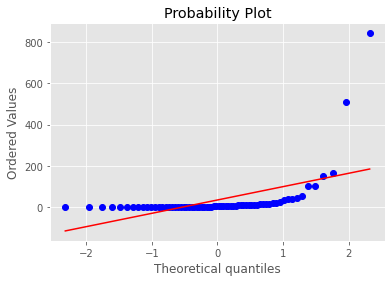

In [ ]:
# import numpy as np 
#import pylab 
import scipy.stats as stats

stats.probplot(df_filter.No_clicks[df_filter['Version'] \
                                   == 'Interact'], dist="norm", plot=plt)


plt.show()

1. `y-axis:` sample of quantiles from your data. 
2. `x-axis:` theirotical quantiles. 
    
    
3. This plot specify the actual probability of distribution, and if we have a normal distribution for our data then this line should has angle $=45$, **diogonal line.**


## AD test:

1. Based on this test we will compare the significance value with respect to criticle value from the test 

In [ ]:
#stats.anderson
ad_test = scipy.stats.anderson(sample1_interact['No_clicks'])


matrix_twosample = [
    ['', 'AD-test Statistic', 'critical_values'],
    ['Sample Data', ad_test[0], ad_test[1]]
]

ad_table = ct(matrix_twosample, index=True)
ad_table

#twosample_results.critical_values

In [ ]:
for i in range(len(ad_test.critical_values)):
    sl, cv = ad_test.significance_level[i], ad_test.critical_values[i]
    if ad_test.statistic < ad_test.critical_values[i]:
        print(f'ad_test.significance_level: {sl}\ncritical_value {cv}: \n, data looks normal (fail to reject H0)\n')
    else:
        print(f'ad_test.significance_level: {sl}\ncritical_value {cv}: \n, data does not look normal (reject H0)\n')

ad_test.significance_level: 15.0
critical_value 0.547: 
, data does not look normal (reject H0)

ad_test.significance_level: 10.0
critical_value 0.623: 
, data does not look normal (reject H0)

ad_test.significance_level: 5.0
critical_value 0.747: 
, data does not look normal (reject H0)

ad_test.significance_level: 2.5
critical_value 0.871: 
, data does not look normal (reject H0)

ad_test.significance_level: 1.0
critical_value 1.037: 
, data does not look normal (reject H0)



## shapiro

In [ ]:
shapiro_test = scipy.stats.shapiro(sample1_interact['No_clicks'])


matrix_twosample = [
    ['', 'shapiro_test', 'p-value'],
    ['Sample Data', shapiro_test[0], shapiro_test[1]]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

### What to do when the data is not gaussian (not normally distributed)? 

1. There are two large groups of tests: 
    * **parametric** - they have assumptions about distributions.
    * **non-parametric**, where you can forget about the distribution assumptions. 
    

2. However, it comes with a catch - often their power is lower. We can use `wilcoxon test` for normality instead of t-test (as the Normality assumption is not fulfilled):

## wilcoxon test

In [ ]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# seed the random number generator
seed(1)


# compare samples
stat, p = wilcoxon(df_interact_connect['No_clicks'])
print(f'Statistics= {stat}, p-value= {p}')

matrix_twosample = [
    ['', 'wilcoxon_test', 'p-value'],
    ['Sample Data', stat, p]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

Statistics= 0.0, p-value= 2.215141881417568e-22


In [ ]:
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Different distribution (reject H0)


* Or we can use transform No_clicks to log10:

In [ ]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

# seed the random number generator
seed(1)


# compare samples
stat, p = wilcoxon(np.log10(df_interact_connect['No_clicks']))
print(f'Statistics= {stat}, p-value= {p}')

matrix_twosample = [
    ['', 'wilcoxon_test', 'p-value'],
    ['Sample Data', stat, p]
]

twosample_table = ct(matrix_twosample, index=True)
twosample_table

Statistics= 0.0, p-value= 1.6393487560214566e-16


## Power of the test


#### how many samples you need with respect to significance, power and effect size:

1. Currently, we do not have the possibility to plan the experiment and make decisions about the sample sizes. In real-life, you first need to calculate how many samples you need with respect to significance, power and effect size:


In [ ]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower


# parameters for power analysis
effect = 0.2 # difference between the two means divided by std
alpha = 0.05
power = 0.8  # no type 2 II error with 80% probability


# https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestPower.solve_power.html
# perform power analysis
analysis = TTestIndPower()

result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 393.406


1. **Power** of the test, e.g. 0.8, is one minus the probability of a `type II error` ($H_0$ is accepted and in reality it should be rejected). **Power** is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true.

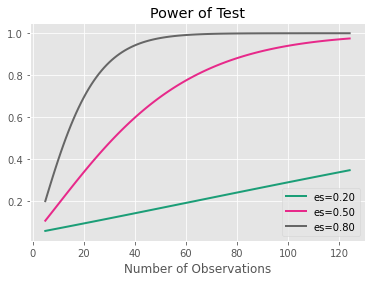

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower


# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 125))


# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

### Test of proportions: 

1. The hypothesis that in general one version of the page is more clicked than another one is quite optimistic. 


2. Let’s narrow down our hypothesis. What if we want to check whether the number of times clicked on this component `(*Connect)` out of all clicks to this page is signifcantly `better (worse) than` the same proportion of clicks in the `default version (Interact)`? Here we test **proportions.**

In [ ]:

clicks

[1587, 1717, 3714, 1652, 1348]

In [ ]:
# total number of clicks
# we have clicks for each version from above cells
total_clicks = sum(clicks)
print(total_clicks)

prop = []
for c in clicks:
    prop.append(c/total_clicks)

prop

mydict = {
    "Version": ["Connect","Help","Interact","Learn","Services"],
    "total_clicks_visited": clicks
}

df1 = pd.DataFrame(mydict)
df1

10018


,Version,total_clicks_visited
0,Connect,1587
1,Help,1717
2,Interact,3714
3,Learn,1652
4,Services,1348


In [ ]:
newdf

,Element_ID,Tag_name,Name,No_clicks,Visible,Version
9,87,a,INTERACT,42,True,Interact
75,92,a,CONNECT,53,True,Connect
137,87,a,LEARN,21,True,Learn
196,92,a,HELP,38,True,Help
253,87,a,SERVICES,45,True,Services


In [ ]:
left_join_df = newdf.merge(df1, on='Version', how='left')

left_join_df['proportions'] = left_join_df["No_clicks"]/left_join_df['total_clicks_visited']

left_join_df

,Element_ID,Tag_name,Name,No_clicks,Visible,Version,total_clicks_visited,proportions
0,87,a,INTERACT,42,True,Interact,3714,0.011309
1,92,a,CONNECT,53,True,Connect,1587,0.033396
2,87,a,LEARN,21,True,Learn,1652,0.012712
3,92,a,HELP,38,True,Help,1717,0.022132
4,87,a,SERVICES,45,True,Services,1348,0.033383


Versions that we are interested in is Interact and connect

In [ ]:
left_join_df.iloc[0:2]['No_clicks']

0    42
1    53
Name: No_clicks, dtype: int64

In [ ]:
from scipy import stats

import numpy as np

interact_connect = np.array([left_join_df.iloc[0:2]['No_clicks']\
                      , left_join_df.iloc[0:2]['total_clicks_visited']])

# print(stats.chi2_contingency(survivors))

chi2_stat, p_val, dof, ex = stats.chi2_contingency(interact_connect)

print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
28.273094325123743


===Degrees of Freedom===
1


===P-Value===
1.0535017776345046e-07


===Contingency Table===
[[  66.12676056   28.87323944]
 [3689.87323944 1611.12676056]]


* There are many tests, but all of them fit into the general framework!

## Conclusion:

1. Type of problem (problem settings) determine the type of tests to be performed.
2. It makes more sense to perform proportion of tests in this scenario.